In [1]:
from lean_euler import LeanEuler
import networkx as nx
from euler_input_visualization_nxpd import visualize_euler_input
from nxpd import draw

In [34]:
# fname = 'Preprocessed_CleanTax_Input/abstract4_mnpw.txt'
# fname = 'Preprocessed_CleanTax_Input/auto_example.txt'
# fname = 'Preprocessed_CleanTax_Input/cen_ndc_1pw.txt'
fname = 'Preprocessed_CleanTax_Input/beer_tax.txt'

In [35]:
cleantax_file = open(fname, 'r').read().split('\n')
cleantax_file

['taxonomy PC Pop_Chart',
 '(Beer Ale Lager)',
 '(Ale MildAle Lambic BelgianAle GermanAle StoutPorter PaleAle)',
 '(Lager GermanLager AmericanLager)',
 'taxonomy BI Business_Insider',
 '(Beer Ale Lager)',
 '(Ale PaleAles Stouts Porters Browns Wheats Sours Belgians) ',
 '(Lager Bocks PaleLagers)',
 'articulations PC BI',
 '[PC.Beer equals BI.Beer]',
 '[PC.Ale equals BI.Ale]',
 '[PC.Lager equals BI.Lager]',
 '[PC.PaleAle equals BI.PaleAles]',
 '[PC.StoutPorter includes BI.Stouts]',
 '[PC.StoutPorter includes BI.Porters]',
 '[PC.BelgianAle overlaps BI.Belgians]',
 '[PC.MildAle equals BI.Browns]',
 '[PC.Lambic includes BI.Sours]',
 '[PC.Lambic overlaps BI.Belgians]',
 '[PC.GermanAle is_included_in BI.Wheats]',
 '[PC.GermanLager includes BI.Bocks]',
 '[PC.AmericanLager is_included_in BI.PaleLagers]',
 '[PC.Lambic disjoint BI.Wheats]',
 '[PC.StoutPorter\tdisjoint BI.Belgians]',
 '[PC.StoutPorter\tdisjoint BI.Wheats]']

In [36]:
rel_data, tax_data = LeanEuler.parse_cleantax(cleantax_file)

In [37]:
rel_data

,Node1,Relation,Node2
0,"""PC_Beer""",parent,"""PC_Ale"""
1,"""PC_Beer""",parent,"""PC_Lager"""
2,"""PC_Ale""",parent,"""PC_MildAle"""
3,"""PC_Ale""",parent,"""PC_Lambic"""
4,"""PC_Ale""",parent,"""PC_BelgianAle"""
5,"""PC_Ale""",parent,"""PC_GermanAle"""
6,"""PC_Ale""",parent,"""PC_StoutPorter"""
7,"""PC_Ale""",parent,"""PC_PaleAle"""
8,"""PC_Lager""",parent,"""PC_GermanLager"""
9,"""PC_Lager""",parent,"""PC_AmericanLager"""


In [38]:
tax_data

{'BI': {'Ale': Node('/BI/"BI_Beer"/"BI_Ale"'),
  'BI': Node('/BI'),
  'Beer': Node('/BI/"BI_Beer"'),
  'Belgians': Node('/BI/"BI_Beer"/"BI_Ale"/"BI_Belgians"'),
  'Bocks': Node('/BI/"BI_Beer"/"BI_Lager"/"BI_Bocks"'),
  'Browns': Node('/BI/"BI_Beer"/"BI_Ale"/"BI_Browns"'),
  'Lager': Node('/BI/"BI_Beer"/"BI_Lager"'),
  'PaleAles': Node('/BI/"BI_Beer"/"BI_Ale"/"BI_PaleAles"'),
  'PaleLagers': Node('/BI/"BI_Beer"/"BI_Lager"/"BI_PaleLagers"'),
  'Porters': Node('/BI/"BI_Beer"/"BI_Ale"/"BI_Porters"'),
  'Sours': Node('/BI/"BI_Beer"/"BI_Ale"/"BI_Sours"'),
  'Stouts': Node('/BI/"BI_Beer"/"BI_Ale"/"BI_Stouts"'),
  'Wheats': Node('/BI/"BI_Beer"/"BI_Ale"/"BI_Wheats"')},
 'PC': {'Ale': Node('/PC/"PC_Beer"/"PC_Ale"'),
  'AmericanLager': Node('/PC/"PC_Beer"/"PC_Lager"/"PC_AmericanLager"'),
  'Beer': Node('/PC/"PC_Beer"'),
  'BelgianAle': Node('/PC/"PC_Beer"/"PC_Ale"/"PC_BelgianAle"'),
  'GermanAle': Node('/PC/"PC_Beer"/"PC_Ale"/"PC_GermanAle"'),
  'GermanLager': Node('/PC/"PC_Beer"/"PC_Lager"/"PC_G

In [39]:
rules = LeanEuler.gen_asp_rules(rel_data, tax_data, encoding='mnpw')

In [40]:
print('\n'.join(rules))

r(1..89).

% Region Meanings
in(X, M) :- r(M), concept(X, T, N), N1=N+1, bit(M, T, N1).
out(X, M) :- r(M), concept(X, T, N), N1=N+1, not bit(M, T, N1).
in(X, M) :- r(M), concept2(X, _), not out(X, M).
irs(M) :- in(X, M), out(X, M), r(M), concept2(X, _).

% Region Constraints
irs(X) :- ir(X, _).
vrs(X) :- vr(X, _).
vr(X, X) :- not irs(X), r(X).
ir(X, X) :- not vrs(X), r(X).
:- vrs(X), irs(X).

concept2(A, B) :- concept(A,B,_).

% Taxonomy Description

%  Euler Bit
bit(M, 0, V) :- r(M), M1=M/1, V = M1 \ 9.

%  Euler Bit
bit(M, 1, V) :- r(M), M1=M/9, V = M1 \ 10.

concept2("PC_Beer", 0).
concept2("PC_Ale", 0).
concept("PC_MildAle", 0, 0).
concept("PC_Lambic", 0, 1).
concept("PC_BelgianAle", 0, 2).
concept("PC_GermanAle", 0, 3).
concept("PC_StoutPorter", 0, 4).
concept("PC_PaleAle", 0, 5).
concept2("PC_Lager", 0).
concept("PC_GermanLager", 0, 6).
concept("PC_AmericanLager", 0, 7).
concept2("BI_Beer", 1).
concept2("BI_Ale", 1).
concept("BI_PaleAles", 1, 0).
concept("BI_Stouts", 1, 1).
conce

In [41]:
# Alternatively, short-cut
rules = LeanEuler.gen_asp_rules_from_cleantax(cleantax_file, encoding='mnpw')
print('\n'.join(rules))

r(1..89).

% Region Meanings
in(X, M) :- r(M), concept(X, T, N), N1=N+1, bit(M, T, N1).
out(X, M) :- r(M), concept(X, T, N), N1=N+1, not bit(M, T, N1).
in(X, M) :- r(M), concept2(X, _), not out(X, M).
irs(M) :- in(X, M), out(X, M), r(M), concept2(X, _).

% Region Constraints
irs(X) :- ir(X, _).
vrs(X) :- vr(X, _).
vr(X, X) :- not irs(X), r(X).
ir(X, X) :- not vrs(X), r(X).
:- vrs(X), irs(X).

concept2(A, B) :- concept(A,B,_).

% Taxonomy Description

%  Euler Bit
bit(M, 0, V) :- r(M), M1=M/1, V = M1 \ 9.

%  Euler Bit
bit(M, 1, V) :- r(M), M1=M/9, V = M1 \ 10.

concept2("PC_Beer", 0).
concept2("PC_Ale", 0).
concept("PC_MildAle", 0, 0).
concept("PC_Lambic", 0, 1).
concept("PC_BelgianAle", 0, 2).
concept("PC_GermanAle", 0, 3).
concept("PC_StoutPorter", 0, 4).
concept("PC_PaleAle", 0, 5).
concept2("PC_Lager", 0).
concept("PC_GermanLager", 0, 6).
concept("PC_AmericanLager", 0, 7).
concept2("BI_Beer", 1).
concept2("BI_Ale", 1).
concept("BI_PaleAles", 1, 0).
concept("BI_Stouts", 1, 1).
conce

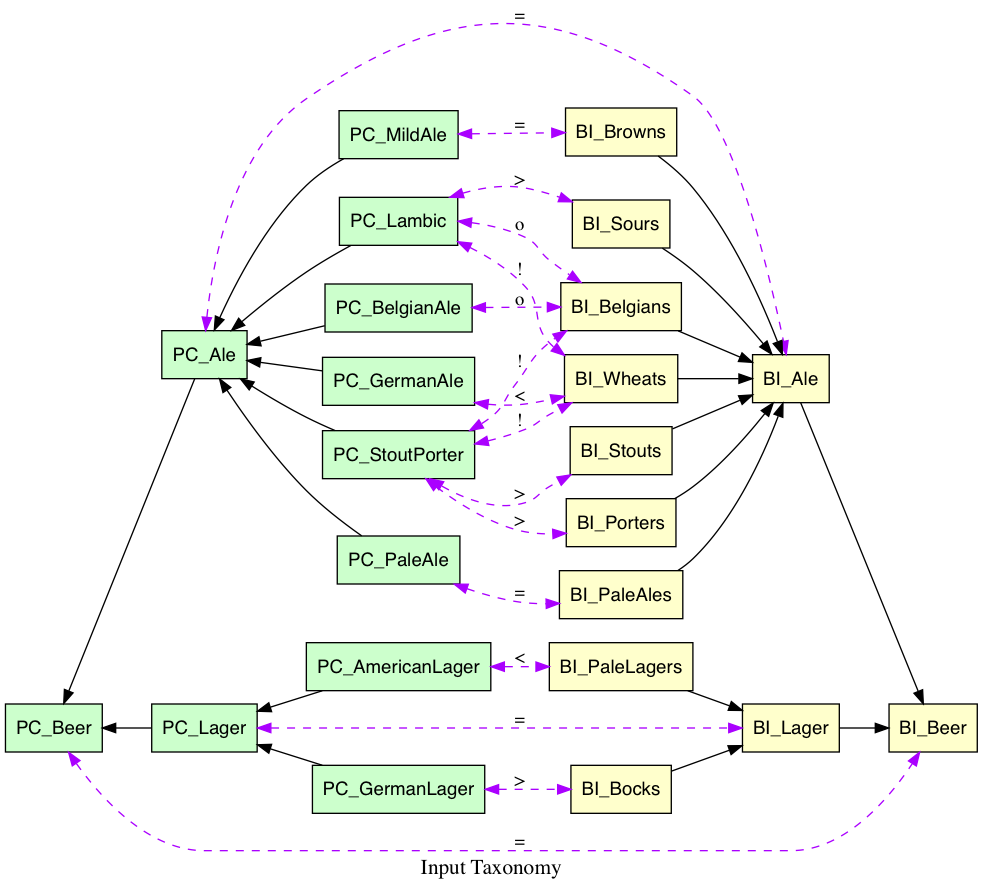

In [43]:
G = visualize_euler_input(rel_data, tax_data)
draw(G, show='ipynb')